<a href="https://colab.research.google.com/github/TSAI-END3-Group/Session_1_Assignment/blob/main/END3_0_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary Libraries


In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

# Data Preparation

X contains the inut tensor<br>
Y contains target tensor

In [3]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

# Defining an XOR model


In [4]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 5)
        self.lin2 = nn.Linear(5, 4)
        
        self.lin3 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        x = F.tanh(x)
        x = self.lin3(x)

        return x

# Model Summary
Detail about the model are:-
  We have Three layers in our model->
  1. Input Layer :- It comprises of two neurons as inputs(X1 and X2).
  2. 2-Hidden Layer :- It conatins 5 and 4 neurons respectively.
  3. Output Layer :- Final and so called output layer it has single neuron.

  ## Parameter Calculation:-

  1. Input Layer has 2 neurons which are connected to hidden layer which has 5 neurons = 5*2+5(Bias) = 15 Parameters
  2. the two hidden layers contains 5 and 4 Neurons = 5*4+4(bias) = 24 Parameters
  3. final output layer which has single neuron and connected through hidden layer having 4 neurons = 4*1+1(bias) = 5

  Total = 15+24+5=44

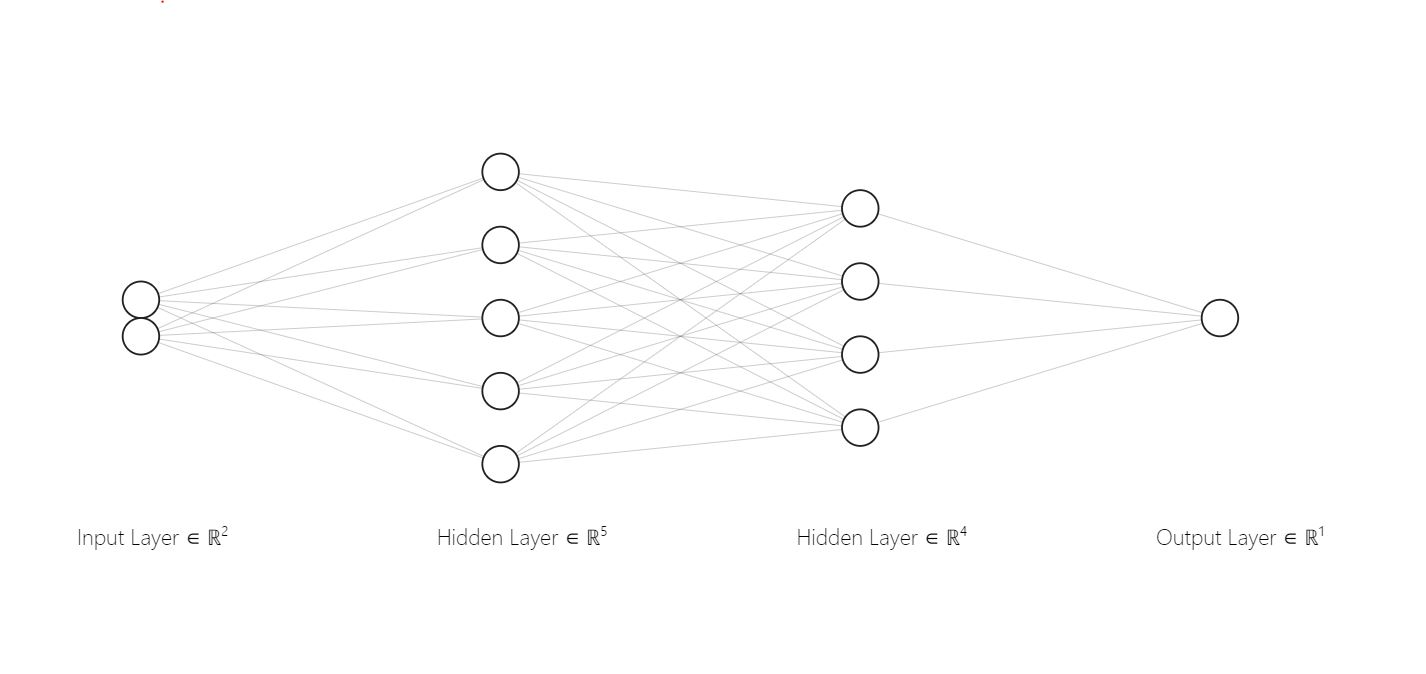

In [5]:
model = XOR() 
print(model)
from torchsummary import summary
summary(model, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=4, bias=True)
  (lin3): Linear(in_features=4, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 5]              15
            Linear-2                 [-1, 2, 4]              24
            Linear-3                 [-1, 2, 1]               5
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


# Weights initializations

In [6]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

# Loss Function Declaration

Here we are using L1Loss only, also we have tried other techniques like MSE Loss and the results are effective in that case.

In [7]:
loss_func = nn.L1Loss()

# Optimizer selection

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


# Model Training ...

In [9]:
epochs = 2001 # As per the assignment we are running model for 2001 epochs
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0, Loss: 0.6574150323867798, 
Epoch: 50, Loss: 1.4691482782363892, 
Epoch: 100, Loss: 0.08096349239349365, 
Epoch: 150, Loss: 0.6700762510299683, 
Epoch: 200, Loss: 0.7509504556655884, 
Epoch: 250, Loss: 0.12717151641845703, 
Epoch: 300, Loss: 0.12076735496520996, 
Epoch: 350, Loss: 0.12476670742034912, 
Epoch: 400, Loss: 0.15632951259613037, 
Epoch: 450, Loss: 0.08512631058692932, 
Epoch: 500, Loss: 0.10556793212890625, 
Epoch: 550, Loss: 0.11899751424789429, 
Epoch: 600, Loss: 0.015094131231307983, 
Epoch: 650, Loss: 0.27684134244918823, 
Epoch: 700, Loss: 0.1817096471786499, 
Epoch: 750, Loss: 0.07868605852127075, 
Epoch: 800, Loss: 0.0950469970703125, 
Epoch: 850, Loss: 0.19386166334152222, 
Epoch: 900, Loss: 0.007525622844696045, 
Epoch: 950, Loss: 0.02323395013809204, 
Epoch: 1000, Loss: 0.31402862071990967, 
Epoch: 1050, Loss: 0.14234185218811035, 
Epoch: 1100, Loss: 0.13624191284179688, 
Epoch: 1150, Loss: 0.2832980155944824, 
Epoch: 1200, Loss: 0.1976107805967331, 
Epoc

# Model Testing 

For final XOR output we are using threshold of 0.5.

In [27]:
lst=[]
for i in range(0,len(X)):
    if model(X[i]).item()<=0.5:
      lst.append(0)
    else :
      lst.append(1)
df=pd.concat([pd.DataFrame(X).rename(columns={0: 'x1', 1: 'x2'}),pd.DataFrame(lst).rename(columns={0: 'Y'})],axis=1)  

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


# Final Data frame with x1 and x2 are inputs and Y is our predicted values

In [29]:
df

,x1,x2,Y
0,tensor(0.),tensor(0.),0
1,tensor(0.),tensor(1.),1
2,tensor(1.),tensor(0.),1
3,tensor(1.),tensor(1.),0
